# 신용카드 사기거래 탐지

> 목차

- 문제상황 및 데이터 살펴보기
- 문제해결 프로세스 정의
- Data전처리 및 EDA
- 차원 축소
- 이상탐지 모델링

In [1]:
# Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# 문제상황 및 데이터 살펴보기

> 시나리오

카드사 A는 최근 비트코인 열풍으로 수수료 거래 금액이 늘어 좋으면서도 한 편으로 골치를 썩고 있다. 비트코인 결제를 신용카드로 결제하여 많은 수수료를 얻어가고 있지만, 그만큼 사기거래가 발생하고 처리해달라는 고객 Claim이 수도 없이 쏟아지기 때문이다. 이에 카드사는 사거기래로 예측되는 거래건에 경우 거래를 제한하고 관리하고자 한다.

> 데이터 살펴보기

Time : 시간

V1~V(n) : 카드 관련 변수

amount : 승인금액

Class : 사기 여부

In [2]:
# pd.set_option
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

df = pd.read_csv("D:\\csv\\chapter04_df.csv")
df.head()
# Class 0 : 정상 거래, 1: 사기 거래

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 문제해결 프로세스 정의

> 문제정의

- 사기 거래 다수 발생
- 소비자 피해 금액 발생

> 기대효과

- 이상거래 사전 차단으로 인한 사기 거래 감소
- 소비자 피해 감소
- 신규 고객 증가

> 해결방안

- 신용카드 거래 데이터 활용 사기거래 탐지 및 차단
- Data 전처리 및 EDA (현재 보유한 데이터로 문제해결이 가능할지 판단)
- 차원 축소를 통해 구분이 가능한 데이터인지 확인 (이진 분류가 가능한지 판단)
- 이상 탐지 모델링 수행

> 성과측정 (KPI) asis -> tobe

- 모델 활용 전/후 사기 거래 건수 비교
- 모델 활용 전/후 소비자 피해 접수 건수 비교
- 모델 활용 전/후 소비자 피해 금액 비교

> 현업적용

- 새로운 카드 거래 발생 시 이상 탐지 모델에 Input
- Scoring 을 통해 Threshold가 이상인 거래에 대해서 거래 차단 및 소비자 Contact

> 주요 코드 미리 살펴보기

- Data전처리 및 EDA

.value_counts(), sns.boxplot()


- 차원 축소

df.sample(frac=1), TSNE(), PCA(), TruncatedSVD()


- 모델링

np.percentile, Counter(), IsolationForest(), .decision_function(X)

# 데이터 전처리 및 EDA

### Data 전처리

- 수집된 데이터의 기본 정보들을 확인

(1) Data shape 확인

(2) Data type 확인

(3) Null값 확인

(4) Outlier 확인

In [3]:
# Data shape (284807 rows, 31 columns)
df.shape

(284807, 31)

In [4]:
# Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Null 값 확인
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
# Outlier 확인
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Data EDA

- 데이터 특성 파악을 위한 초기 탐색

In [7]:
# 정상/이상 데이터 갯수 확인 (정상 284315, 이상 492)
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
df['Time']

0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
            ...   
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, Length: 284807, dtype: float64

In [9]:
# 필요없는 column 삭제
df = df.drop(['Time'], axis=1)

<AxesSubplot:xlabel='Class', ylabel='V1'>

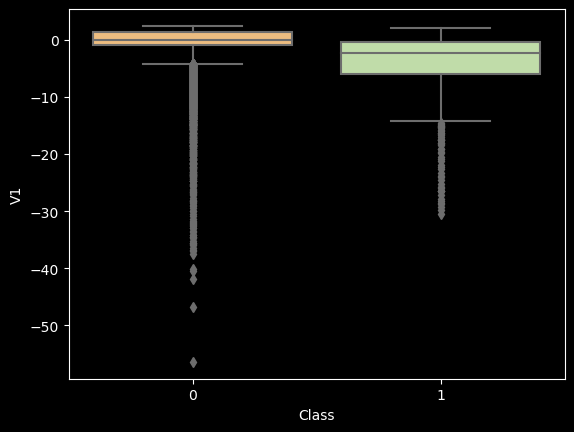

In [10]:
# Box plot : 시각화를 통해 데이터를 빠르게 파악
# 이상여부를 기준으로 특정 데이터의 값 비교 (V1)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['dark_background'])

sns.boxplot(data=df, x='Class', y='V1', palette='Spectral')

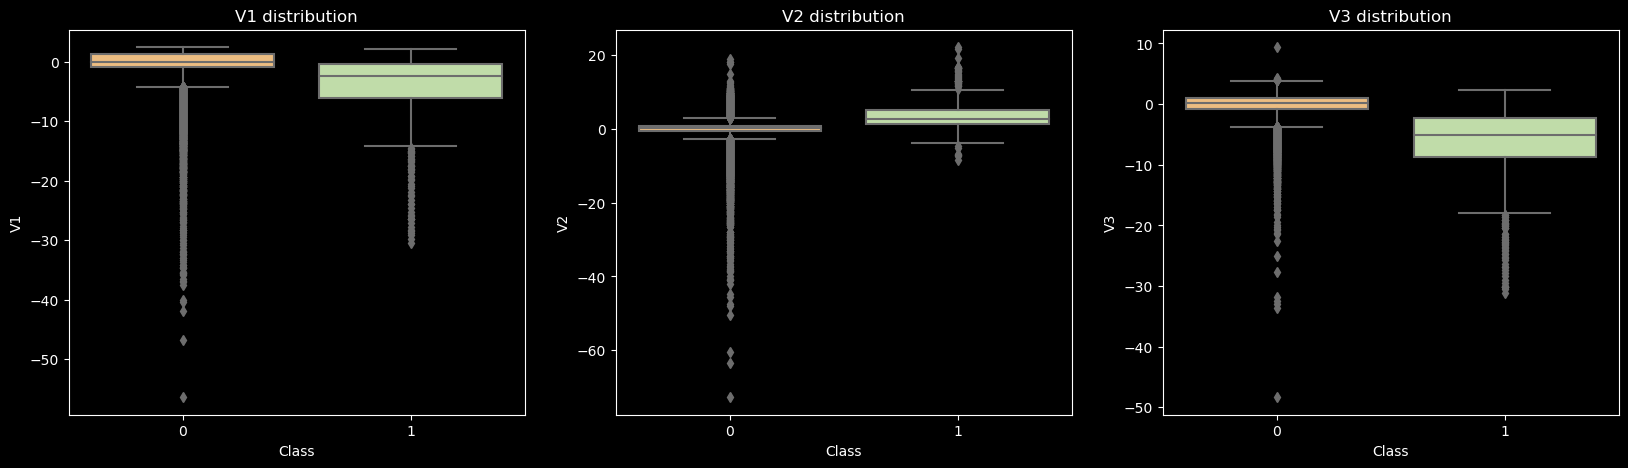

In [11]:
# 이상여부를 기준으로 특정 데이터의 값 비교 (V1, V2, V3)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

sns.boxplot(ax=axes[0], data=df, x='Class', y='V1', palette='Spectral')
axes[0].set_title("V1 distribution");

sns.boxplot(ax=axes[1], data=df, x='Class', y='V2', palette='Spectral')
axes[1].set_title("V2 distribution");

sns.boxplot(ax=axes[2], data=df, x='Class', y='V3', palette='Spectral')
axes[2].set_title("V3 distribution");

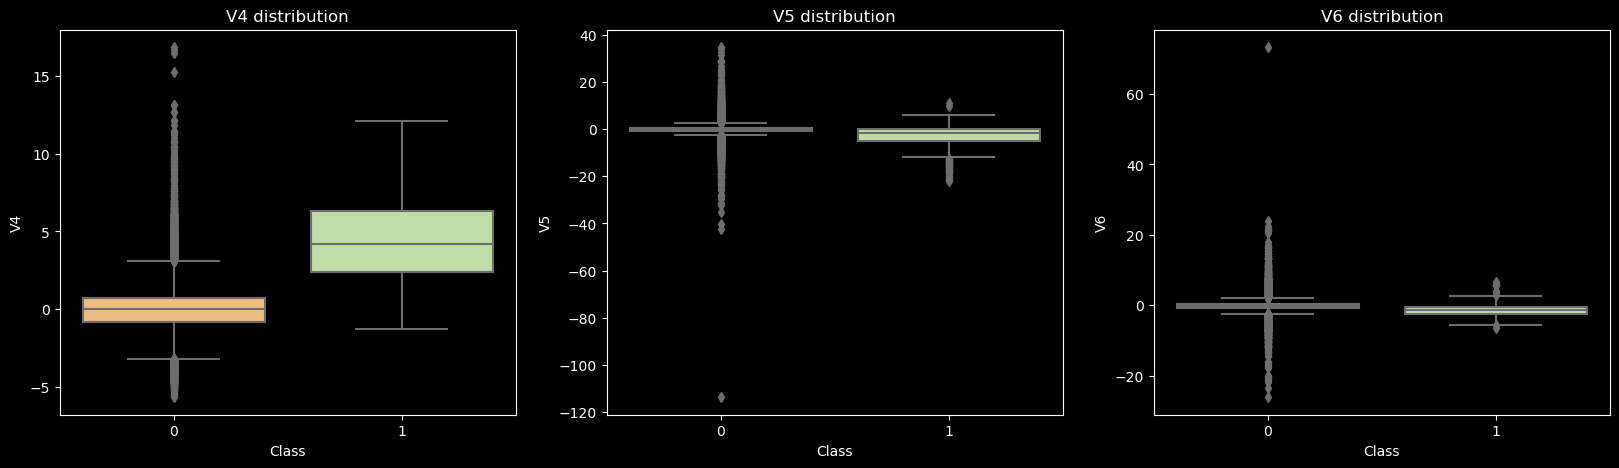

In [12]:
# 이상여부를 기준으로 특정 데이터의 값 비교 (V4, V5, V6)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

sns.boxplot(ax=axes[0], data=df, x='Class', y='V4', palette='Spectral')
axes[0].set_title("V4 distribution");

sns.boxplot(ax=axes[1], data=df, x='Class', y='V5', palette='Spectral')
axes[1].set_title("V5 distribution");

sns.boxplot(ax=axes[2], data=df, x='Class', y='V6', palette='Spectral')
axes[2].set_title("V6 distribution");

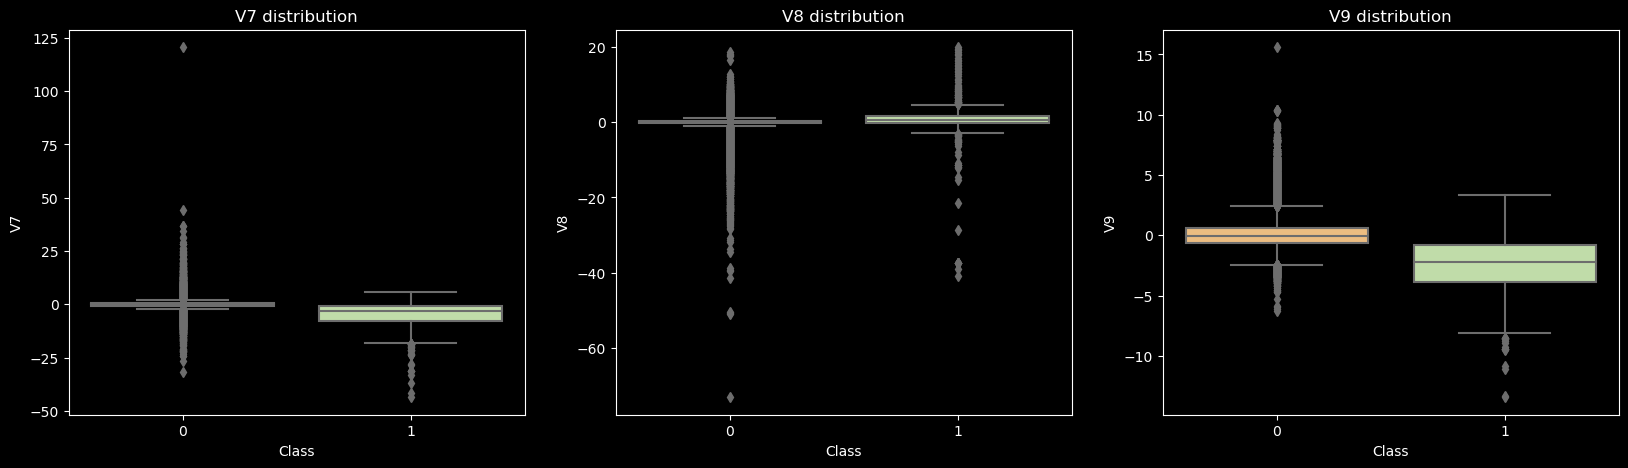

In [13]:
# 이상여부를 기준으로 특정 데이터의 값 비교 (V7, V8, V9)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

sns.boxplot(ax=axes[0], data=df, x='Class', y='V7', palette='Spectral')
axes[0].set_title("V7 distribution");

sns.boxplot(ax=axes[1], data=df, x='Class', y='V8', palette='Spectral')
axes[1].set_title("V8 distribution");

sns.boxplot(ax=axes[2], data=df, x='Class', y='V9', palette='Spectral')
axes[2].set_title("V9 distribution");

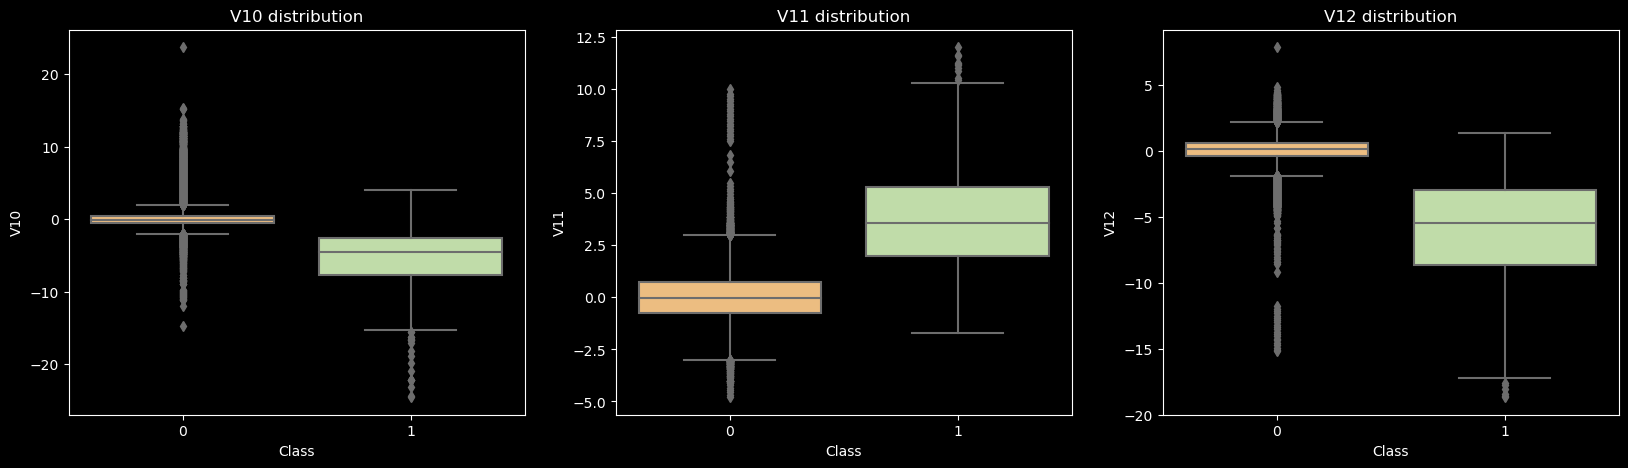

In [14]:
# 이상여부를 기준으로 특정 데이터의 값 비교 (V10, V11, V12)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

sns.boxplot(ax=axes[0], data=df, x='Class', y='V10', palette='Spectral')
axes[0].set_title("V10 distribution");

sns.boxplot(ax=axes[1], data=df, x='Class', y='V11', palette='Spectral')
axes[1].set_title("V11 distribution");

sns.boxplot(ax=axes[2], data=df, x='Class', y='V12', palette='Spectral')
axes[2].set_title("V12 distribution");

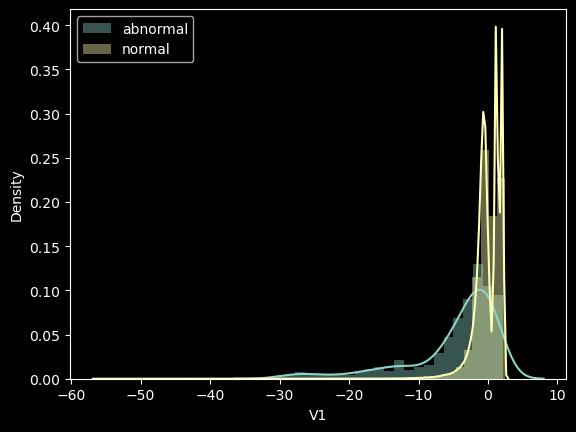

In [15]:
# 분포도 확인
# histogram + KDE plot = distplot
sns.distplot(df[df['Class'] == 1]['V1'], label='abnormal');
sns.distplot(df[df['Class'] == 0]['V1'], label='normal');
plt.legend();

# normal이 대부분 0에 가까움

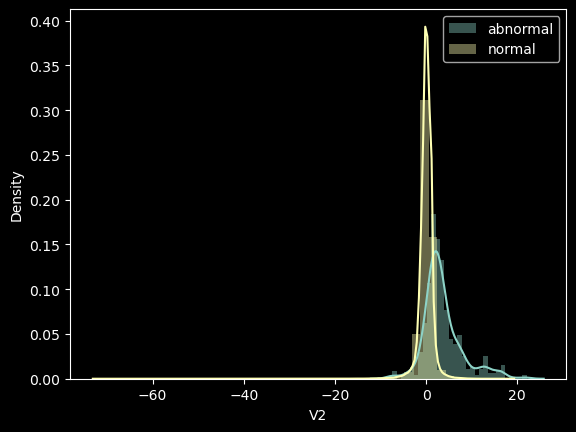

In [16]:
# 분포도 확인
# histogram + KDE plot = distplot
sns.distplot(df[df['Class'] == 1]['V2'], label='abnormal');
sns.distplot(df[df['Class'] == 0]['V2'], label='normal');
plt.legend();

# normal이 대부분 0에 가까움

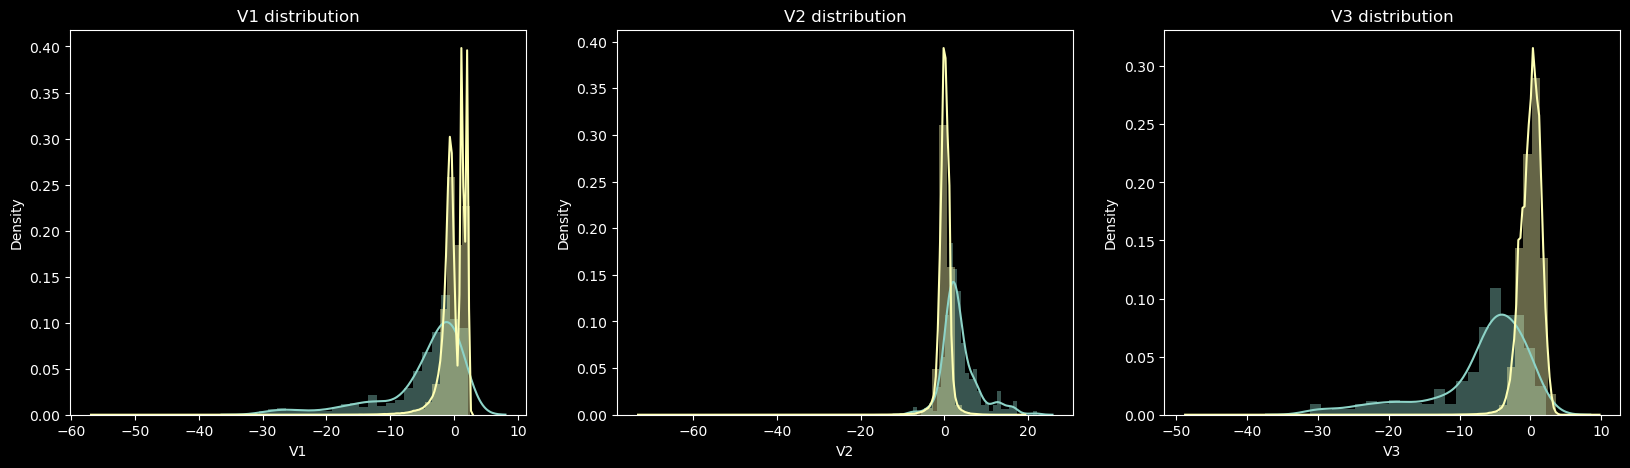

In [17]:
# distplot 여러개 클래스간 각 데이터 분포 비교
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

sns.distplot(df[df['Class'] == 1]['V1'], label='abnormal', ax=axes[0]);
sns.distplot(df[df['Class'] == 0]['V1'], label='normal', ax=axes[0]);
axes[0].set_title("V1 distribution");

sns.distplot(df[df['Class'] == 1]['V2'], label='abnormal', ax=axes[1]);
sns.distplot(df[df['Class'] == 0]['V2'], label='normal', ax=axes[1]);
axes[1].set_title("V2 distribution");

sns.distplot(df[df['Class'] == 1]['V3'], label='abnormal', ax=axes[2]);
sns.distplot(df[df['Class'] == 0]['V3'], label='normal', ax=axes[2]);
axes[2].set_title("V3 distribution");

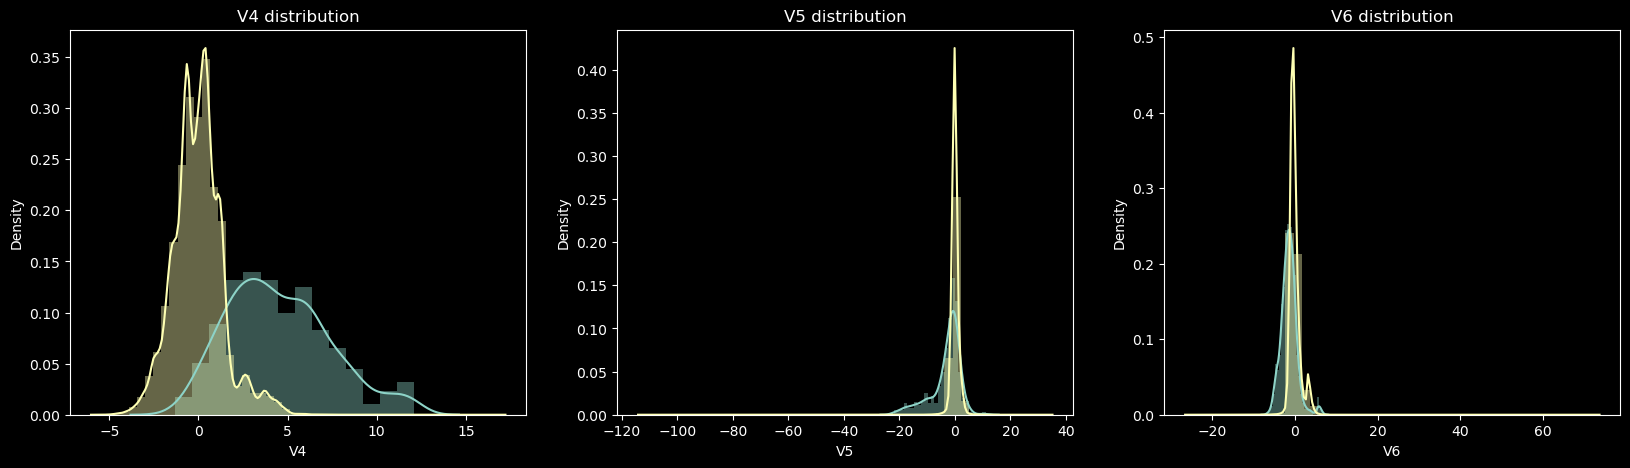

In [18]:
# distplot 여러개 클래스간 각 데이터 분포 비교
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

sns.distplot(df[df['Class'] == 1]['V4'], label='abnormal', ax=axes[0]);
sns.distplot(df[df['Class'] == 0]['V4'], label='normal', ax=axes[0]);
axes[0].set_title("V4 distribution");

sns.distplot(df[df['Class'] == 1]['V5'], label='abnormal', ax=axes[1]);
sns.distplot(df[df['Class'] == 0]['V5'], label='normal', ax=axes[1]);
axes[1].set_title("V5 distribution");

sns.distplot(df[df['Class'] == 1]['V6'], label='abnormal', ax=axes[2]);
sns.distplot(df[df['Class'] == 0]['V6'], label='normal', ax=axes[2]);
axes[2].set_title("V6 distribution");

In [19]:
df[df['Class'] == 1]['V4'].describe()

count    492.000000
mean       4.542029
std        2.873318
min       -1.313275
25%        2.373050
50%        4.177147
75%        6.348729
max       12.114672
Name: V4, dtype: float64

In [20]:
df[df['Class'] == 0]['V4'].describe()

count    284315.000000
mean         -0.007860
std           1.399333
min          -5.683171
25%          -0.850077
50%          -0.022405
75%           0.737624
max          16.875344
Name: V4, dtype: float64

In [21]:
# describe 로 정상/비정상 간의 수치 비교 (V4)
v4_abnormal = pd.DataFrame(df[df['Class'] == 1]['V4'].describe())
v4_normal = pd.DataFrame(df[df['Class'] == 0]['V4'].describe())
v4_des = pd.concat([v4_abnormal, v4_normal], axis=1)

v4_des.columns = ['abnormal', 'normal']
v4_des

,abnormal,normal
count,492.000000,284315.000000
mean,4.542029,-0.007860
std,2.873318,1.399333
min,-1.313275,-5.683171
25%,2.373050,-0.850077
50%,4.177147,-0.022405
75%,6.348729,0.737624
max,12.114672,16.875344


# 차원 축소

### PCA vs T-sne vs TruncatedSVD

- 차원축소를 통해 우리가 보유하고 있는 데이터가 정상/비정상 패턴으로 분류가 가능한지 Viz.를 통해 확인

In [22]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Random Down-Sampling

- Imbalanced Data 이기 때문에 모든 데이터를 비교할 수 없음 (갯수 차이가 너무 커서 시각화를 통한 비교가 어려움)
- Class 0(정상)인 데이터를 Down-sampling 해서 Class 1(이상) 데이터와 비교분석

In [25]:
# shuffle 기능 (랜덤하게 섞기)
df = df.sample(frac = 1)

# amount of fraud classes 492 rows. (1:1 비율)
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

# row 형태로 붙임
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows (붙인다음 섞기)
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
119717,1.251008,-1.619336,-0.089314,-1.784909,-0.822738,0.983374,-1.170478,0.197721,-1.861976,1.463327,-0.042697,-0.542141,0.955476,-0.315789,0.464075,0.270320,-0.202552,0.625383,0.249896,0.022674,-0.260841,-0.702591,-0.169523,-1.736464,0.221734,-0.262411,0.032138,0.025556,159.0,0
141258,-0.937843,3.462889,-6.445104,4.932199,-2.233983,-2.291561,-5.695594,1.338825,-4.322377,-8.099119,7.182967,-9.445943,-0.314620,-12.991466,-0.136359,-6.367524,-12.734394,-3.845130,1.007667,1.129532,1.066550,-0.521657,-0.319917,-0.405859,0.906802,1.165784,1.374495,0.729889,0.0,1
134093,1.177076,0.578651,-0.376805,1.066586,0.454467,-0.208963,0.125942,0.048391,-0.359636,-0.447753,1.709486,0.741440,0.167938,-0.896236,0.607438,0.492310,0.567366,0.589399,-0.529684,-0.099875,0.008581,0.107824,-0.145692,-0.410072,0.640612,-0.295782,0.045736,0.034862,1.0,0
93486,1.079524,0.872988,-0.303850,2.755369,0.301688,-0.350284,-0.042848,0.246625,-0.779176,-0.157696,1.928568,-0.935863,-2.431446,-1.633472,0.534337,1.425606,1.593529,1.178468,-1.568698,-0.252115,-0.023255,-0.158601,-0.038806,-0.060327,0.358339,0.076984,0.018936,0.060574,0.0,1
244004,-4.673231,4.195976,-8.392423,7.743215,-1.138803,-2.094899,-3.839487,0.543053,-1.528448,-2.325113,4.355770,-8.663031,-1.153993,-13.481705,1.208454,-4.287960,-5.651765,-1.235889,1.080133,-0.180279,0.554185,0.656076,0.482417,-0.624399,-0.296289,0.374802,-2.678544,0.412368,1.0,1


In [27]:
# 492건씩 동일하게 정상과 비정상을 구성
new_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [28]:
# 다운 샘플링한 데이터를 표준화
from sklearn.preprocessing import StandardScaler

X = new_df.drop('Class', axis=1)    # Class 컬럼을 드랍
y = new_df['Class']     # Class 컬럼으로 구성

X_ = StandardScaler().fit_transform(X)
X_ = pd.DataFrame(X_)

In [29]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import time

# T-SNE
t0 = time.time()
# 2차원 데이터로 축소
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_.values)
t1 = time.time()
print("T-SNE learning time {:.2} s".format(t1-t0))

# PCA
t0 = time.time()
# 2차원 데이터로 축소
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X_.values)
t1 = time.time()
print("PCA learning time {:.2} s".format(t1-t0))

# TruncatedSVD
t0 = time.time()
# 2차원 데이터로 축소
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)    # 원본 X 사용
t1 = time.time()
print("TruncatedSVD learning time {:.2} s".format(t1-t0))

T-SNE learning time 2.8 s
PCA learning time 0.0 s
TruncatedSVD learning time 0.0 s


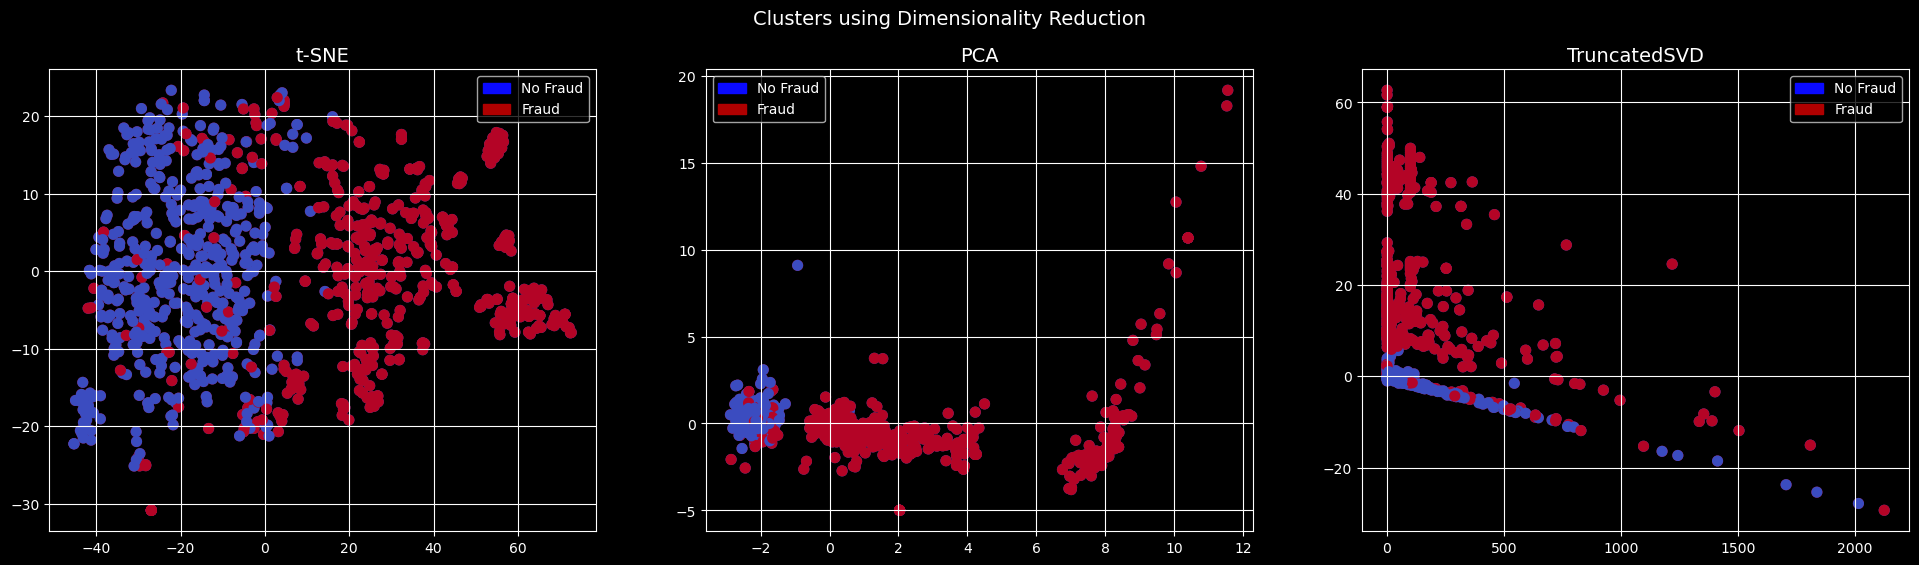

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
%matplotlib inline
plt.style.use(['dark_background'])

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y==0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y==1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y==0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y==1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y==0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y==1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('TruncatedSVD', fontsize=14)

ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])

plt.show()

# 갖고 있는 데이터(v1~v28, amount)로 이진분류가 되는지 점검

# 이상탐지 모델링

### Model Selection
- Box plot Anomaly Detection

In [36]:
# 많은 데이터를 눈으로 확인하기 어려울 때 그림을 이용해 데이터 집합의 범위와 중앙값을 빠르게 확인
# Box plot은 최소 정상값(min), 1사분위수(Q1), 중앙값, 3사분위수(Q3), 최대 정상값(max)를 나타내는 시각화 방법

# [good] 데이터를 눈으로 확인하기 어려울 때, 그림을 이용해 범위를 빠르게 파악
# [good] 통계적으로 이상치(outlier)가 있는지 확인 가능
# [good] 다양한 정보를 손쉽게 표현 가능
# [bad] 위치정보에 기반하고 있기 때문에 분포를 확인하기는 어려움
# [bad] 가운데 선은 평균이 아님. 오해의 소지가 있음

In [37]:
# IQR Method
from collections import Counter

# IQR : 단별량 변수에서 주로 사용 (다별량에 적용할 때는 배열로 나눠서 진행)
def IQR_method(df, n, features):
    outlier_list = []
    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column], 75)
        
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index
        # appending the list
        outlier_list.append(outlier_list_column)
    #selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)
    multiple_outliers = list(k for k, v in outlier_list.items() if v > n)
    
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] < Q1 - outlier_step]
    df2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of outliers is:', len(multiple_outliers))
    
    return multiple_outliers

In [38]:
outlier_list = []
n = 1

column = 'V1'

# 1st quartile (25%)
Q1 = np.percentile(df[column], 25)
# 3rd quartile (75%)
Q3 = np.percentile(df[column], 75)

# Interquartile range (IQR)
IQR = Q3 - Q1

# outlier step
outlier_step = 1.5 * IQR

# Determining a list of indices of outliers
outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index

# appending the list of outliers
outlier_list.extend(outlier_list_column)

# selecting observations containing more than x outliers
outlier_list = Counter(outlier_list)
multiple_outliers = list(k for k, v in outlier_list.items() if v > n)

In [39]:
df['V1'].describe()

count    2.848070e+05
mean     1.181957e-15
std      1.958696e+00
min     -5.640751e+01
25%     -9.203734e-01
50%      1.810880e-02
75%      1.315642e+00
max      2.454930e+00
Name: V1, dtype: float64

In [40]:
Q1

-0.920373384390322